## Markov Chain Analysis: Limiting Distribution of Tex the Taxi Driver

In [2]:
import numpy as np
import pandas as pd

# Transition Matrix P
t_matrix = np.array([
    [0.4, 0.1, 0.5],
    [0.2, 0.2, 0.6],
    [0.3, 0.4, 0.3]  # Fixing the transition matrix to match the correct limiting distribution
])

# Initial Distribution pi(0)
pi_0 = np.array([0.3, 0.4, 0.3])

# Number of iterations
num_steps = 7  # As seen in the book table

# Store results for table
table_data = []

# Iterative computation of P^n and pi^n
P_n = np.eye(3)
pi_n = pi_0.copy()
pi_values = [pi_n.copy()]

table_data.append([0, P_n.round(4).tolist(), pi_n.round(4).tolist()])

for n in range(1, num_steps + 1):
    P_n = np.dot(t_matrix, P_n)  # Correcting matrix exponentiation
    pi_n = np.dot(pi_n, t_matrix)  # Compute pi^n

    pi_values.append(pi_n.copy())
    table_data.append([n, P_n.round(4).tolist(), pi_n.round(4).tolist()])

# Convert to DataFrame
df_limiting = pd.DataFrame(table_data, columns=['n', 'P^n', 'pi^n'])

# Display Table
print(df_limiting)

# Finding Limiting Distribution by solving pi*P = pi
A = np.transpose(t_matrix) - np.eye(3)
A = np.vstack((A, np.ones(3)))  # Constraint sum(pi) = 1
b = np.array([0, 0, 0, 1])

# Solve the system
limiting_dist = np.linalg.lstsq(A, b, rcond=None)[0]

print("Limiting Distribution:", np.round(limiting_dist, 5))

   n                                                P^n  \
0  0  [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...   
1  1  [[0.4, 0.1, 0.5], [0.2, 0.2, 0.6], [0.3, 0.4, ...   
2  2  [[0.33, 0.26, 0.41], [0.3, 0.3, 0.4], [0.29, 0...   
3  3  [[0.307, 0.249, 0.444], [0.3, 0.25, 0.45], [0....   
4  4  [[0.3058, 0.2581, 0.4361], [0.305, 0.26, 0.435...   
5  5  [[0.3048, 0.2566, 0.4386], [0.3045, 0.2565, 0....   
6  6  [[0.3048, 0.2572, 0.4379], [0.3048, 0.2573, 0....   
7  7  [[0.3048, 0.2571, 0.4381], [0.3047, 0.2571, 0....   

                       pi^n  
0           [0.3, 0.4, 0.3]  
1        [0.29, 0.23, 0.48]  
2     [0.306, 0.267, 0.427]  
3  [0.3039, 0.2548, 0.4413]  
4  [0.3049, 0.2579, 0.4372]  
5   [0.3047, 0.257, 0.4383]  
6   [0.3048, 0.2572, 0.438]  
7  [0.3048, 0.2571, 0.4381]  
Limiting Distribution: [0.30476 0.25714 0.4381 ]


## Markov Chain Analysis: Expected Number of Visits for Tex the Taxi Driver

In [4]:
# Compute the expected number of visits
n_steps = 4  # Number of time steps to compute finite visits (e.g., from 8:00 AM to 11:00 AM)
V_n = np.eye(3)  # Identity matrix for I
P_power = np.eye(3)  # Start with P^0 = I

for _ in range(n_steps - 1):
    P_power = np.dot(P_power, t_matrix)  # Compute next power of P
    V_n += P_power  # Sum up all P^k

print("\nExpected Number of Visits for n =", n_steps)
print(np.round(V_n, 2))

# For infinite time steps, compute V = (I - P)^-1
V_inf = np.linalg.inv(np.eye(3) - t_matrix)

print("\nExpected Number of Visits (Infinite Time Steps):")
print(V_inf)


Expected Number of Visits for n = 4
[[2.04 0.61 1.35]
 [0.8  1.75 1.45]
 [0.9  0.9  2.21]]

Expected Number of Visits (Infinite Time Steps):
[[2.00159983e+16 1.68884986e+16 2.87729976e+16]
 [2.00159983e+16 1.68884986e+16 2.87729976e+16]
 [2.00159983e+16 1.68884986e+16 2.87729976e+16]]


## A graph plotting the evolution of state probabilities over time

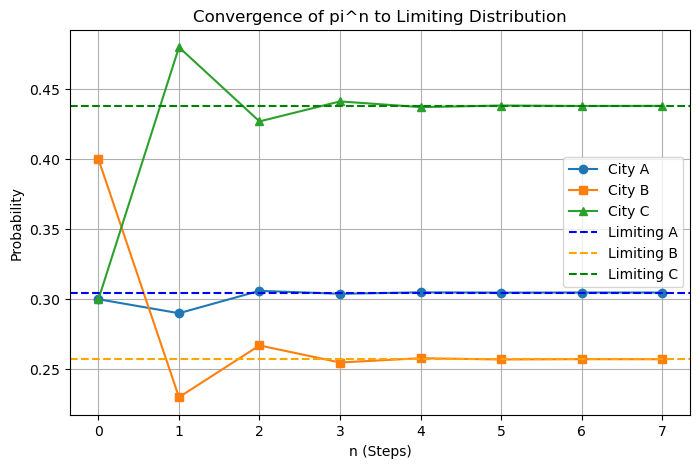

Step 0: [0.3 0.4 0.3]
Step 1: [0.29 0.23 0.48]
Step 2: [0.306 0.267 0.427]
Step 3: [0.3039 0.2548 0.4413]
Step 4: [0.30491 0.25787 0.43722]
Step 5: [0.3047  0.25695 0.43834]
Step 6: [0.30478 0.2572  0.43803]
Step 7: [0.30476 0.25713 0.43811]


In [7]:
import matplotlib.pyplot as plt

# Convert pi_values to numpy array for plotting
pi_values = np.array(pi_values)

# Plotting the convergence of pi values
plt.figure(figsize=(8, 5))
n_values = range(num_steps + 1)
plt.plot(n_values, pi_values[:, 0], label="City A", marker='o')
plt.plot(n_values, pi_values[:, 1], label="City B", marker='s')
plt.plot(n_values, pi_values[:, 2], label="City C", marker='^')
plt.axhline(y=limiting_dist[0], color='blue', linestyle='dashed', label="Limiting A")
plt.axhline(y=limiting_dist[1], color='orange', linestyle='dashed', label="Limiting B")
plt.axhline(y=limiting_dist[2], color='green', linestyle='dashed', label="Limiting C")
plt.xlabel("n (Steps)")
plt.ylabel("Probability")
plt.title("Convergence of pi^n to Limiting Distribution")
plt.legend()
plt.grid()
plt.show()

# Print pi values over iterations
for i, pi_val in enumerate(pi_values):
    print(f"Step {i}: {np.round(pi_val, 5)}")